In [35]:
import math
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import scipy.special as sp
import numpy as np
import json

In [36]:
# !put seed here, because I want nn.Sequential and others like train_loader and sample_generator to
# produce the same init/sample at each run, so that I can find the problem and solve it
# torch.manual_seed(20010302)

In [37]:
input_size = 100
hidden_1 = 10
hidden_2 = 20
output_size = 1

# Create the MLP model using nn.Sequential
MLP = nn.Sequential(
    nn.Linear(input_size, 1),
    # nn.ReLU()
    # nn.Linear(hidden_1, output_size)
    # nn.ReLU(),
    # nn.Linear(hidden_2, output_size)
)

In [38]:
# Define training model
def train(model, criterion, optimizer, train_loader, number_epochs):
    # print(list(MLP.parameters()))
    loss_list = []

    for epoch in range(number_epochs):
        loss_run = 0
        for batch_x, batch_y in train_loader:
            # params = list(model.parameters())
            # print(f'Params: {params}')

            # forward pass
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

            # backward + optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss and accuracy record
            loss_run += loss.item()

        loss_run /= len(train_loader)
        loss_list.append(loss_run)

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{number_epochs}], Loss: {loss_run:.4f}')

    # draw the curves
    plt.semilogy(loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [39]:
with open('data.json', 'r') as f:
    data = json.load(f)

In [40]:
# make train loader
num_samples = 1000
batch_size = 20
x = torch.randint(low = 0, high = 100, size = (num_samples, input_size), dtype=torch.float)
y = torch.tensor([[sum(sp.binom(i, 3) * j for i, j in enumerate(s))] for s in x], dtype=torch.float)
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=batch_size, shuffle=True)

Epoch [100/1000], Loss: 2908207447.0400
Epoch [200/1000], Loss: 634152.4519
Epoch [300/1000], Loss: 5578.7520
Epoch [400/1000], Loss: 4717.8240
Epoch [500/1000], Loss: 4456.9600
Epoch [600/1000], Loss: 4261.6320
Epoch [700/1000], Loss: 4107.7760
Epoch [800/1000], Loss: 3984.3840
Epoch [900/1000], Loss: 3931.3920
Epoch [1000/1000], Loss: 3856.6400


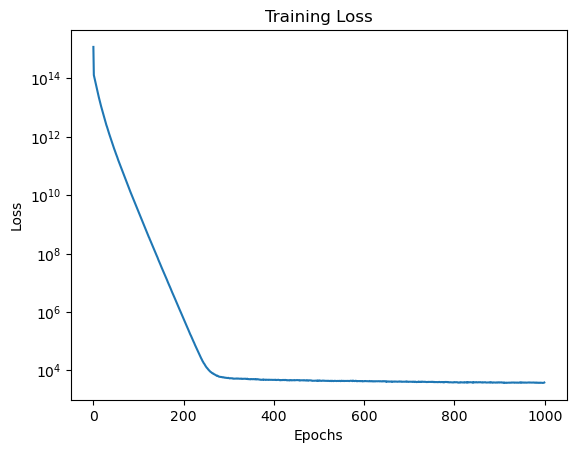

In [41]:
learning_rate = 1
# for Adam, it needs 1500, and after 1500 it will be overfit and loss will increase. the learning rate should be 1 or more
# but for SGD, it will use tens of epochs. learning rate should be 0.00001 or always get inf loss
num_epochs = 1000
criterion = nn.MSELoss()
optimizer = optim.SGD(MLP.parameters(), 0.000001)
# optimizer = optim.Adam(MLP.parameters(), lr=100, betas=(0.9, 0.999))

train(MLP, criterion, optimizer, train_loader, num_epochs)

In [42]:
test_x = torch.randint(low = 0, high = 100, size = (100, input_size), dtype=torch.float)
s1 = time.time()
test_y = torch.tensor([[sum(sp.binom(i, 3) * j for i, j in enumerate(s))] for s in test_x], dtype=torch.float)
e1 = time.time()
print(e1-s1)

s2 = time.time()
res = MLP(test_x)
e2 = time.time()
print(e2-s2)

for i in range(100):
    print(f'test_y: {test_y[i].item()}    predict: {res[i].item():.2f}    error: {max(test_y[i].item()/res[i].item()-1, res[i].item()/test_y[i].item()-1):.4}')

0.06428718566894531
0.00045418739318847656
test_y: 199086912.0    predict: 199086912.00    error: 0.0
test_y: 217585760.0    predict: 217585744.00    error: 7.353e-08
test_y: 203560464.0    predict: 203560448.00    error: 7.86e-08
test_y: 187599184.0    predict: 187599232.00    error: 2.559e-07
test_y: 190106768.0    predict: 190106752.00    error: 8.416e-08
test_y: 207810048.0    predict: 207810048.00    error: 0.0
test_y: 165632096.0    predict: 165632160.00    error: 3.864e-07
test_y: 167573744.0    predict: 167573776.00    error: 1.91e-07
test_y: 201234144.0    predict: 201234144.00    error: 0.0
test_y: 177974160.0    predict: 177974176.00    error: 8.99e-08
test_y: 181335360.0    predict: 181335488.00    error: 7.059e-07
test_y: 168236400.0    predict: 168236416.00    error: 9.51e-08
test_y: 216667808.0    predict: 216667744.00    error: 2.954e-07
test_y: 193012144.0    predict: 193012144.00    error: 0.0
test_y: 200839152.0    predict: 200839072.00    error: 3.983e-07
test_y: 20

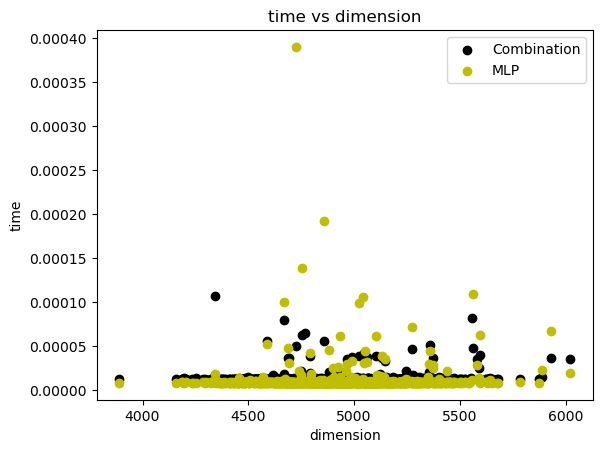

mean error: 2.933767754071948e-07
time_formula: 1.3148069381713867e-05
time_slp: 1.0587215423583984e-05


In [43]:
time_list_escape = []
time_list_MLP = []
dimension_list = []
error_list = []
for i in range(1000):
    a = np.random.randint(low=0, high=100, size=input_size)
    a_t = torch.tensor(a, dtype=torch.float)
    t1 = time.time()
    # b = sum(sp.binom(i, 3) * j for i, j in enumerate(a))
    b = sum(math.comb(i, 3) * j for i, j in enumerate(a))
    t2 = time.time()
    c = MLP(a_t)
    t3 = time.time()
    r = c[0].item()
    time_list_escape.append(t2-t1)
    time_list_MLP.append(t3-t2)
    dimension_list.append(sum(a))
    error_list.append(max(r/b-1, b/r-1))
    
plt.scatter(dimension_list, time_list_escape, c='k', label='Combination')
plt.scatter(dimension_list, time_list_MLP, c='y', label='MLP')
plt.xlabel('dimension')
plt.ylabel('time')
plt.title('time vs dimension')
plt.legend()
plt.show()

print(f'mean error: {np.mean(error_list)}')
print(f'time_formula: {np.mean(time_list_escape)}')
print(f'time_slp: {np.mean(time_list_MLP)}')
# print(list(MLP.parameters()))